In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
#Open file and load it as pandas
PdUltimate = pd.read_json("../ultimate_challenge/logins.json")

## Explore Data

In [3]:
PdUltimate.shape

(93142, 1)

In [4]:
#Review the observations
PdUltimate.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [20]:
PdUltimate.tail(20)

,count
login_time,
1970-04-13 17:52:11,1
1970-04-13 18:05:42,1
1970-04-13 18:09:57,1
1970-04-13 18:16:48,1
1970-04-13 18:18:26,1
1970-04-13 18:14:55,1
1970-04-13 18:12:34,1
1970-04-13 18:35:43,1
1970-04-13 18:36:55,1


Data covers January 1st, 1970 to April 13th, 1970

In [5]:
PdUltimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
# Group the data to 15-min-interval bins
PdUltimate.set_index('login_time', inplace=True)
PdUltimate['count'] = 1
DataT = PdUltimate.resample('15T').sum()
DataT

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [8]:
# Do we have all observations?
DataT['count'].sum()

93142

In [7]:
# What was the product demand per 15-min-interval?
DataT['count'].value_counts()

2     726
4     706
3     703
5     658
1     638
6     632
7     539
8     508
9     437
10    420
11    413
0     407
13    311
12    309
14    288
15    246
16    219
17    213
18    152
19    146
20    138
21    117
23    101
22    101
24     73
25     69
26     55
27     54
30     44
28     41
     ... 
32     35
34     28
33     27
37     18
35     17
41     16
38     15
36     14
39      9
42      9
40      8
45      8
43      8
46      6
50      5
47      4
44      3
59      2
60      2
53      2
56      1
48      1
63      1
64      1
73      1
66      1
55      1
52      1
54      1
51      1
Name: count, Length: 62, dtype: int64

The most frequent number of login counts per 15-min-interval was 2 or 2 users requested the service. During a particular 15-min-interval, there were 73 users demanding the service. Note that in 407 instances, there were no logins during 15-min intervals or basically, there was no demand for the service.


In [9]:
#Statistics on the Count variable
DataT.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Peforming some descriptive stasticial analysis, it is observed that in average there are 9.5 logins during a given 15 min-interval. The resulting value for the standard deviation shows that the observations are spread out.  
The 3 sigma spread to the right is 33 indicating that any observations bigger than 3 could be considered outliers. 

In [10]:
DataT['count'].iplot(kind='hist', xTitle='# of Logins per 15-min intervals ',
                  yTitle='count', title=' Demand Distribution')

In [11]:
DataT['count'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Count of Logins per 15-Min intervals',
    title='Demand Trends from January to April')

The demand of the product seems to experience regular and predictable changes over this particular time period. The graph shows that Demand rises exponentially during certain periods, which needs to be investigated further. 

In [12]:
#Find Highest Demand(peak)
past = datetime.datetime(1970, 3, 1)
past.weekday()  # Which day is?

6

In [27]:
#Next peak in March
past1 = datetime.datetime(1970, 3, 13)
past1.weekday()  # what I look for

4

In [30]:
#Peaks during April
past2 = datetime.datetime(1970, 4, 12)
past2.weekday()

6

In [31]:
past3 = datetime.datetime(1970, 4, 2)
past3.weekday()

3

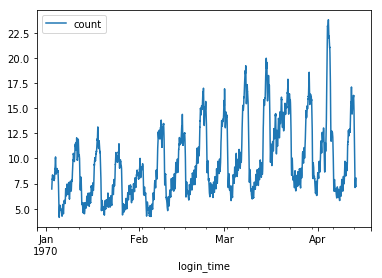

In [13]:
#Zoom in 
DataT.rolling(window=110).mean().plot()
plt.show()

Clearly, there is a trend that shows Demand goes up after a couple of days but there is not assurance this increase takes place during the weekend. Lets find out the actual days of these observations

In [14]:
# Looking into the first observation from the data
yesterday=datetime.datetime(1970,1,4)
yesterday.weekday()

6

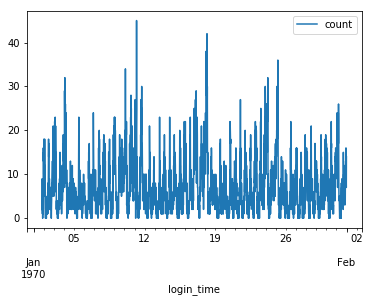

In [15]:
#Monthly Zoom in
DataT.loc['1970-01'].plot()
plt.show()

In [16]:
yesterday=datetime.datetime(1970,1,18)
yesterday.weekday()

6

It is becoming clearer that indeed increases in demand take place during the weekends. For example, highest peak in January is January 11th, which is a Saturday. The next peak takes place in January 18th, which is also Saturday. A more granular view is needed it.

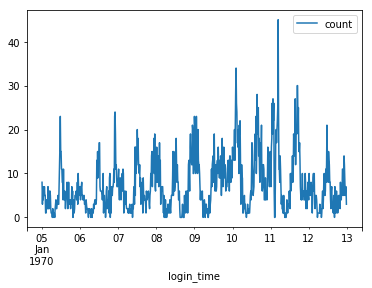

In [17]:
# Weekly Zoom In
DataT.loc['1970-01-05':'1970-01-12'].plot()
plt.show()

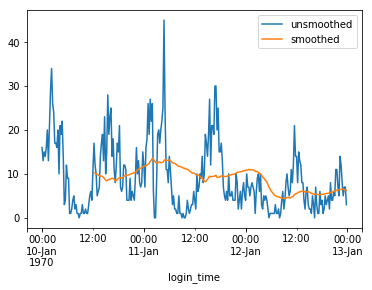

In [18]:
unsmoothed = DataT['count']['1970-01-10':'1970-01-12']
smoothed = unsmoothed.rolling(window=50).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()


This graph confirms that demand increases during the weekends and also provides an additional insight on the actual time of the day this takes place: Wee hours! 

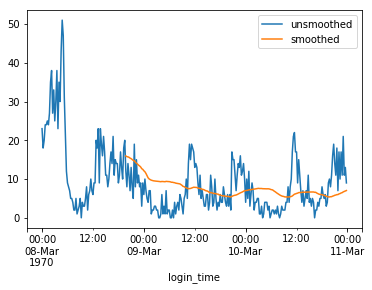

In [19]:
# What about Weekdays?
unsmoothed = DataT['count']['1970-03-08':'1970-03-10']
smoothed = unsmoothed.rolling(window=80).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

Contrary to weekends, demand for the service increases during early morning (when people are getting to work) and around noon (when is time to grab lunch). 